In [13]:
import six

In [1]:
%load_ext autoreload
%autoreload 2


import anchor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=20))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-04-14 09:54:14	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-04-14 09:54:14	Parsing datapackage to create a Study object
2016-04-14 09:55:00	Initializing Study
2016-04-14 09:55:00	Initializing Predictor configuration manager for Study
2016-04-14 09:55:00	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-04-14 09:55:00	Added ExtraTreesClassifier to default predictors
2016-04-14 09:55:00	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-04-14 09:55:00	Added ExtraTreesRegressor to default predictors
2016-04-14 09:55:00	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-04-14 09:55:00	Added GradientBoostingClassifier to default predictors
2016-04-14 09:55:00	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
ls /projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/alternative/

downstream400_placental_mammal_conservation.csv
exon2_merkin2012_ancient.csv
exon2_phastcons_placental_mammal.bed
exon2_phastcons_placental_mammal.txt
exons.bed
exons.fasta
exons_merkin2012_ancient_alt_exons.bed
exons_phastcons_placental_mammal.bed
exons_phastcons_placental_mammal.txt
exons_stop_plus1.bed
gc_content.csv
genes_expanded.csv
isoform_domain_effects.csv
isoform_domain_pfam_accession.csv
isoform_domain_pfam_go_id.csv
isoform_domain_pfam_go_name.csv
isoform_domain_pfam_name.csv
isoform_protein_properties/
isoform_translations.csv@
isoform_translations.fa
isoform_translations.fa_iupred_out
isoform_translations.fa_iupred_tmp
isoform_translations_hmmscan_pfamA.txt
isoform_translations_hmmscan_pfamA.txt.err
isoform_translations_hmmscan_pfamA.txt.out
maxentscan.csv
nucleotide_content/
phastcons_placental_mammal.txt@
protein_translations.csv
repetitive_element_overlap.csv
upstream400_placental_mammal_conservation.csv


In [65]:
figure_folder = 'pdfs' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/isoform_domain_effects'
! mkdir $figure_folder

mkdir: cannot create directory `pdfs': File exists


In [11]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)


splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [21]:
isoform_domain_effects = pd.read_csv('{}/isoform_domain_effects.csv'.format(alternative_feature_folder), index_col=0, 
                                     squeeze=True)
six.print_(isoform_domain_effects.shape)
isoform_domain_effects.head()

(22152,)


event_name
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+    No annotated reading frame --> Protein +/- domain
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-    No annotated reading frame --> Protein +/- domain
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+                                          Same status
Name: isoform_domain_effects, dtype: object

In [22]:
from anchor import MODALITY_ORDER

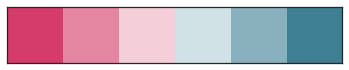

In [23]:
col = 'isoform_domain_effects'

order = MODALITY_ORDER[:3]
isoform_domain_effects_order = [
    'No annotated reading frame --> Protein +/- domain',
    'No domain --> Domain',
    'Domain switch',       
    'Same status',
    'Domain --> No domain',
    'Protein +/- domain --> No annotated reading frame', 
]

hue_order = isoform_domain_effects_order
palette = sns.diverging_palette(0, 220, n=6)
sns.palplot(palette)

In [24]:
domain_total_sizes = isoform_domain_effects.groupby(isoform_domain_effects).size().reset_index()
domain_total_sizes = domain_total_sizes.rename(columns={0: 'count'})
domain_total_sizes.head()

,isoform_domain_effects,count
0,Domain --> No domain,125
1,Domain switch,40
2,No annotated reading frame --> Protein +/- domain,14132
3,No domain --> Domain,654
4,Protein +/- domain --> No annotated reading frame,4203


In [25]:
domain_total_sizes['percentage'] = 100 * domain_total_sizes['count']/domain_total_sizes['count'].sum()
domain_total_sizes.head()

,isoform_domain_effects,count,percentage
0,Domain --> No domain,125,0.564283
1,Domain switch,40,0.180571
2,No annotated reading frame --> Protein +/- domain,14132,63.795594
3,No domain --> Domain,654,2.952329
4,Protein +/- domain --> No annotated reading frame,4203,18.973456


In [60]:
sns.set(context='paper', style='ticks')

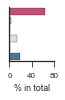

In [66]:
fig, ax = plt.subplots(figsize=(1, 1.5))
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order)
ax.set(xlabel='% in total', yticks=[], ylabel='', xticks=(0, 40, 80), xlim=(0, 80))
# ax.locator_params(nbins=4, axis='x')
sns.despine()
fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution.pdf'.format(figure_folder))

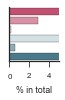

In [67]:
fig, ax = plt.subplots(figsize=(1, 1.5))
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order)
ax.set(xlabel='% in total', yticks=[], ylabel='', xlim=(0, 5))
ax.locator_params(nbins=4, axis='x')
sns.despine()
fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution_zoom5.pdf'.format(figure_folder))

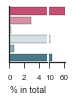

In [68]:
fig, axes = plt.subplots(figsize=(1, 1), ncols=2, gridspec_kw=dict(wspace=0.1, width_ratios=[0.7, 0.3]))
ax = axes[0]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(yticks=[], ylabel='', xlim=(0, 5), xlabel='% in total')
ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax)

ax = axes[1]
sns.barplot(x='percentage', y=col, data=domain_total_sizes, orient='h', 
            palette=palette, order=isoform_domain_effects_order, ax=ax)
ax.set(xlabel='', yticks=[], ylabel='', xlim=(10, 65), xticks=[10, 60])
# ax.locator_params(nbins=4, axis='x')
sns.despine(ax=ax, left=True)

# fig.tight_layout()
fig.savefig('{}/isoform_domain_effects_underlying_distribution_split_axes.pdf'.format(figure_folder))

In [69]:
modalities_domains = study.supplemental.modalities_tidy.join(isoform_domain_effects, on='event_id')
modalities_domains.head()

,phenotype,event_id,modality,isoform_domain_effects
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
1,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,No annotated reading frame --> Protein +/- domain
2,MN,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,Protein +/- domain --> No annotated reading frame
3,MN,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,Same status
4,MN,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,Protein +/- domain --> No annotated reading frame


In [70]:
sizes = modalities_domains.groupby(['phenotype', 'modality', col]).size()
sizes = sizes.reset_index()
sizes = sizes.rename(columns={0: 'count'})
sizes['percentage'] = 100 *sizes.groupby(['phenotype', 'modality'])['count'].apply(lambda x: x/x.sum())
sizes.head()

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,ambivalent,Protein +/- domain --> No annotated reading frame,1,100.000000
1,MN,bimodal,Domain --> No domain,2,0.851064
2,MN,bimodal,Domain switch,1,0.425532
3,MN,bimodal,No annotated reading frame --> Protein +/- domain,109,46.382979
4,MN,bimodal,No domain --> Domain,21,8.936170


In [71]:
sizes.loc[sizes['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,count,percentage
2,MN,bimodal,Domain switch,1,0.425532
13,MN,included,Domain switch,3,0.238663
30,NPC,included,Domain switch,8,0.318218
40,iPSC,bimodal,Domain switch,3,0.323276
46,iPSC,excluded,Domain switch,2,0.201207
52,iPSC,included,Domain switch,10,0.258598


In [72]:
sizes.loc[sizes['modality'] == 'bimodal']

,phenotype,modality,isoform_domain_effects,count,percentage
1,MN,bimodal,Domain --> No domain,2,0.851064
2,MN,bimodal,Domain switch,1,0.425532
3,MN,bimodal,No annotated reading frame --> Protein +/- domain,109,46.382979
4,MN,bimodal,No domain --> Domain,21,8.936170
5,MN,bimodal,Protein +/- domain --> No annotated reading frame,49,20.851064
6,MN,bimodal,Same status,53,22.553191
20,NPC,bimodal,Domain --> No domain,3,0.583658
21,NPC,bimodal,No annotated reading frame --> Protein +/- domain,235,45.719844
22,NPC,bimodal,No domain --> Domain,33,6.420233
23,NPC,bimodal,Protein +/- domain --> No annotated reading frame,130,25.291829


In [73]:
sizes.groupby(['phenotype', 'modality'])['percentage'].max()

phenotype  modality  
MN         ambivalent    100.000000
           bimodal        46.382979
           excluded       82.697947
           included       83.929992
NPC        ambivalent     50.000000
           bimodal        45.719844
           excluded       81.602374
           included       81.901352
iPSC       ambivalent     45.000000
           bimodal        45.797414
           excluded       79.175050
           included       81.174037
Name: percentage, dtype: float64

In [74]:
sns.set(context='paper', style='ticks')

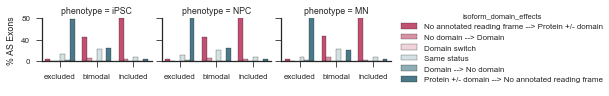

In [75]:
g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=sizes,
#                        hue_order=hue_order, palette=palette, 
                   hue_order=hue_order, aspect=1.3,
                   palette=palette,
                   order=order, size=1.5,
                   col_order=study.phenotype_order)
g.set(yticks=(0, 40, 80), ylim=(0, 80))
g.set_ylabels('% AS Exons')
g.set_xlabels('')
g.savefig('{}/modality_features_isoform_domain_effects_barplot.pdf'.format(figure_folder))

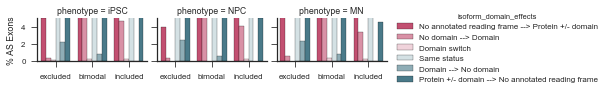

In [77]:

g = sns.factorplot(hue=col, col='phenotype', x='modality', y='percentage', kind='bar',  data=sizes,
#                        hue_order=hue_order, palette=palette, 
                   hue_order=hue_order, aspect=1.3,
                   palette=palette,
                   order=order, size=1.5,
                   col_order=study.phenotype_order)
g.set(ylim=(0, 5), yticks=(0, 2, 4))
g.set_ylabels('% AS Exons')
g.set_xlabels('')
g.savefig('{}/modality_features_isoform_domain_effects_barplot_zoom5.pdf'.format(figure_folder))

In [78]:
modality_order = MODALITY_ORDER[:3]

In [79]:
sizes.loc[sizes.percentage > 60]

,phenotype,modality,isoform_domain_effects,count,percentage
0,MN,ambivalent,Protein +/- domain --> No annotated reading frame,1,100.000000
10,MN,excluded,Protein +/- domain --> No annotated reading frame,282,82.697947
14,MN,included,No annotated reading frame --> Protein +/- domain,1055,83.929992
28,NPC,excluded,Protein +/- domain --> No annotated reading frame,550,81.602374
31,NPC,included,No annotated reading frame --> Protein +/- domain,2059,81.901352
49,iPSC,excluded,Protein +/- domain --> No annotated reading frame,787,79.175050
53,iPSC,included,No annotated reading frame --> Protein +/- domain,3139,81.174037


### Plot with split axes

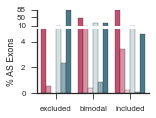

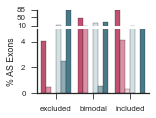

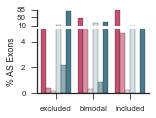

In [81]:

for phenotype, df in sizes.groupby('phenotype'):
    
    fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                             gridspec_kw=dict(hspace=0.075, height_ratios=[0.2, 0.8]))

    ax = axes[0]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
                hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax, bottom=True)
    ax.tick_params(axis='x', bottom='off')
    ax.set(xticks=[], xlabel='', ylim=(10, 85), ylabel='', yticks=[10, 50, 85])

    ax = axes[1]
    sns.barplot(x='modality', hue=col, y='percentage', data=df, ax=ax,
               hue_order=hue_order, palette=palette, x_order=modality_order)
    ax.set(ylim=(0, 5), ylabel='% AS Exons', 
           xlabel='')
    ax.legend_.set_visible(False)
    ax.locator_params('y', nbins=4)
    sns.despine(ax=ax)


    fig.savefig('{}/modality_features_{}_{}_barplot.pdf'.format(figure_folder, col, phenotype))

### Statistics of enrichment (Hypergeometric)

In [82]:
import six

In [83]:
from scipy.stats import hypergeom

lines = []

for phenotype, phenotype_df in modalities_domains.groupby(['phenotype']):
#     six.print_(phenotype)
    M = phenotype_df.shape[0]
    phenotype_domain_grouped_sizes = phenotype_df.groupby(col).size()
    for modality, modality_df in phenotype_df.groupby('modality'):
        n = modality_df.shape[0]
#         six.print_('\t', modality)
        
        grouped = modality_df.groupby(col)
        for domain, domain_df in modality_df.groupby(col):
#             six.print_('\t\t\t', domain)
            N = phenotype_domain_grouped_sizes[domain]
            x = domain_df.shape[0]

            result = hypergeom.sf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype, modality, domain, result])
domain_p_value_df = pd.DataFrame(lines, columns=['phenotype', 'modality', col, '$p$-value'])
domain_p_value_df

,phenotype,modality,isoform_domain_effects,$p$-value
0,MN,ambivalent,Protein +/- domain --> No annotated reading frame,0.000000e+00
1,MN,bimodal,Domain --> No domain,2.065681e-01
2,MN,bimodal,Domain switch,1.032545e-01
3,MN,bimodal,No annotated reading frame --> Protein +/- domain,1.000000e+00
4,MN,bimodal,No domain --> Domain,7.637441e-05
5,MN,bimodal,Protein +/- domain --> No annotated reading frame,8.694192e-01
6,MN,bimodal,Same status,2.684109e-08
7,MN,excluded,Domain --> No domain,4.198004e-05
8,MN,excluded,No annotated reading frame --> Protein +/- domain,1.000000e+00
9,MN,excluded,No domain --> Domain,9.999887e-01


In [84]:
domain_p_value_df['$q$-value'] = domain_p_value_df.shape[0] * domain_p_value_df['$p$-value']
domain_p_value_df.head()

,phenotype,modality,isoform_domain_effects,$p$-value,$q$-value
0,MN,ambivalent,Protein +/- domain --> No annotated reading frame,0.000000,0.000000
1,MN,bimodal,Domain --> No domain,0.206568,11.774381
2,MN,bimodal,Domain switch,0.103255,5.885507
3,MN,bimodal,No annotated reading frame --> Protein +/- domain,1.000000,57.000000
4,MN,bimodal,No domain --> Domain,0.000076,0.004353


In [85]:
domain_p_value_df.loc[domain_p_value_df['isoform_domain_effects'] == 'Domain switch']

,phenotype,modality,isoform_domain_effects,$p$-value,$q$-value
2,MN,bimodal,Domain switch,0.103255,5.885507
13,MN,included,Domain switch,0.160952,9.174279
30,NPC,included,Domain switch,0.000000,0.000000
40,iPSC,bimodal,Domain switch,0.271176,15.457010
46,iPSC,excluded,Domain switch,0.623676,35.549509
52,iPSC,included,Domain switch,0.245761,14.008376


### Get just significantly enriched

In [86]:
domain_p_value_df.loc[domain_p_value_df['$q$-value'] < 1e-10].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                        
MN        ambivalent  Protein +/- domain --> No annotated reading frame   
          excluded    Protein +/- domain --> No annotated reading frame   
          included    No annotated reading frame --> Protein +/- domain   
NPC       excluded    Protein +/- domain --> No annotated reading frame   
          included                                        Domain switch   
          included    No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                           Same status   
          excluded    Protein +/- domain --> No annotated reading frame   
          included    No annotated reading frame --> Protein +/- domain   

                          $p$-value      $q$-value  
phenotype modality                                  
MN        ambivalent   0.000000e+00   0.000000e+00  
          excluded    1.097102e-126  6.253480e-125  
          included    3.621698e-158  2.064368e-156  
NPC       excluded    2.290080e-226  1.305346e-224  
          included     0.000000e+00   0.000000e+00  
          included    9.369152e-307  5.340417e-305  
iPSC      bimodal      1.435581e-19   8.182812e-18  
          excluded    5.413840e-306  3.085889e-304  
          included     0.000000e+00   0.000000e+00

In [87]:
domain_p_value_df.loc[domain_p_value_df['$q$-value'] < 1e-5].set_index(['phenotype', 'modality']).sort_index()

isoform_domain_effects  \
phenotype modality                                                        
MN        ambivalent  Protein +/- domain --> No annotated reading frame   
          bimodal                                           Same status   
          excluded    Protein +/- domain --> No annotated reading frame   
          included    No annotated reading frame --> Protein +/- domain   
NPC       bimodal                                           Same status   
          excluded                                 Domain --> No domain   
          excluded    Protein +/- domain --> No annotated reading frame   
          included                                        Domain switch   
          included    No annotated reading frame --> Protein +/- domain   
iPSC      bimodal                                           Same status   
          excluded                                 Domain --> No domain   
          excluded    Protein +/- domain --> No annotated reading frame   
          included    No annotated reading frame --> Protein +/- domain   

                          $p$-value      $q$-value  
phenotype modality                                  
MN        ambivalent   0.000000e+00   0.000000e+00  
          bimodal      2.684109e-08   1.529942e-06  
          excluded    1.097102e-126  6.253480e-125  
          included    3.621698e-158  2.064368e-156  
NPC       bimodal      1.488277e-11   8.483179e-10  
          excluded     1.234767e-10   7.038172e-09  
          excluded    2.290080e-226  1.305346e-224  
          included     0.000000e+00   0.000000e+00  
          included    9.369152e-307  5.340417e-305  
iPSC      bimodal      1.435581e-19   8.182812e-18  
          excluded     5.690829e-10   3.243772e-08  
          excluded    5.413840e-306  3.085889e-304  
          included     0.000000e+00   0.000000e+00

In [88]:
domain_p_value_df.to_csv('{}/isoform_domain_effects_hypergeometric_statistical_test.csv'.format(figure_folder))